In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import confusion_matrix #for confusion matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [41]:
df =pd.read_csv('brain_stroke.csv')

In [42]:
df.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             105.92  32.5     never smoked       1  
2          Urban             171.23  34.4           smokes       1  
3          Rural             174.12  24.0     never smoked       1  
4          Urban             186.21  29.0  formerly smoked       1

In [43]:
df.loc[df['age']<18, 'work_type'].value_counts()

children         673
Private          132
Self-employed     12
Govt_job           6
Name: work_type, dtype: int64

In [44]:
df.loc[df['age']==17, 'work_type'].value_counts()

Private          47
Self-employed     3
Govt_job          3
Name: work_type, dtype: int64

In [45]:
df.loc[df['age']==16, 'work_type'].value_counts()

Private          35
children         11
Self-employed     1
Govt_job          1
Name: work_type, dtype: int64

In [46]:
df.loc[df['age']<=16 , 'work_type']='children'

In [47]:
df.loc[df['age']==16, 'work_type'].value_counts()

children    48
Name: work_type, dtype: int64

In [48]:
df.stroke.value_counts()

0    4733
1     248
Name: stroke, dtype: int64

##### The data is highy imbalaced.

##### The number of those without stroke(4733) overwhelms when compared to those with stroke (248).

### Visualizing the data in its original form.

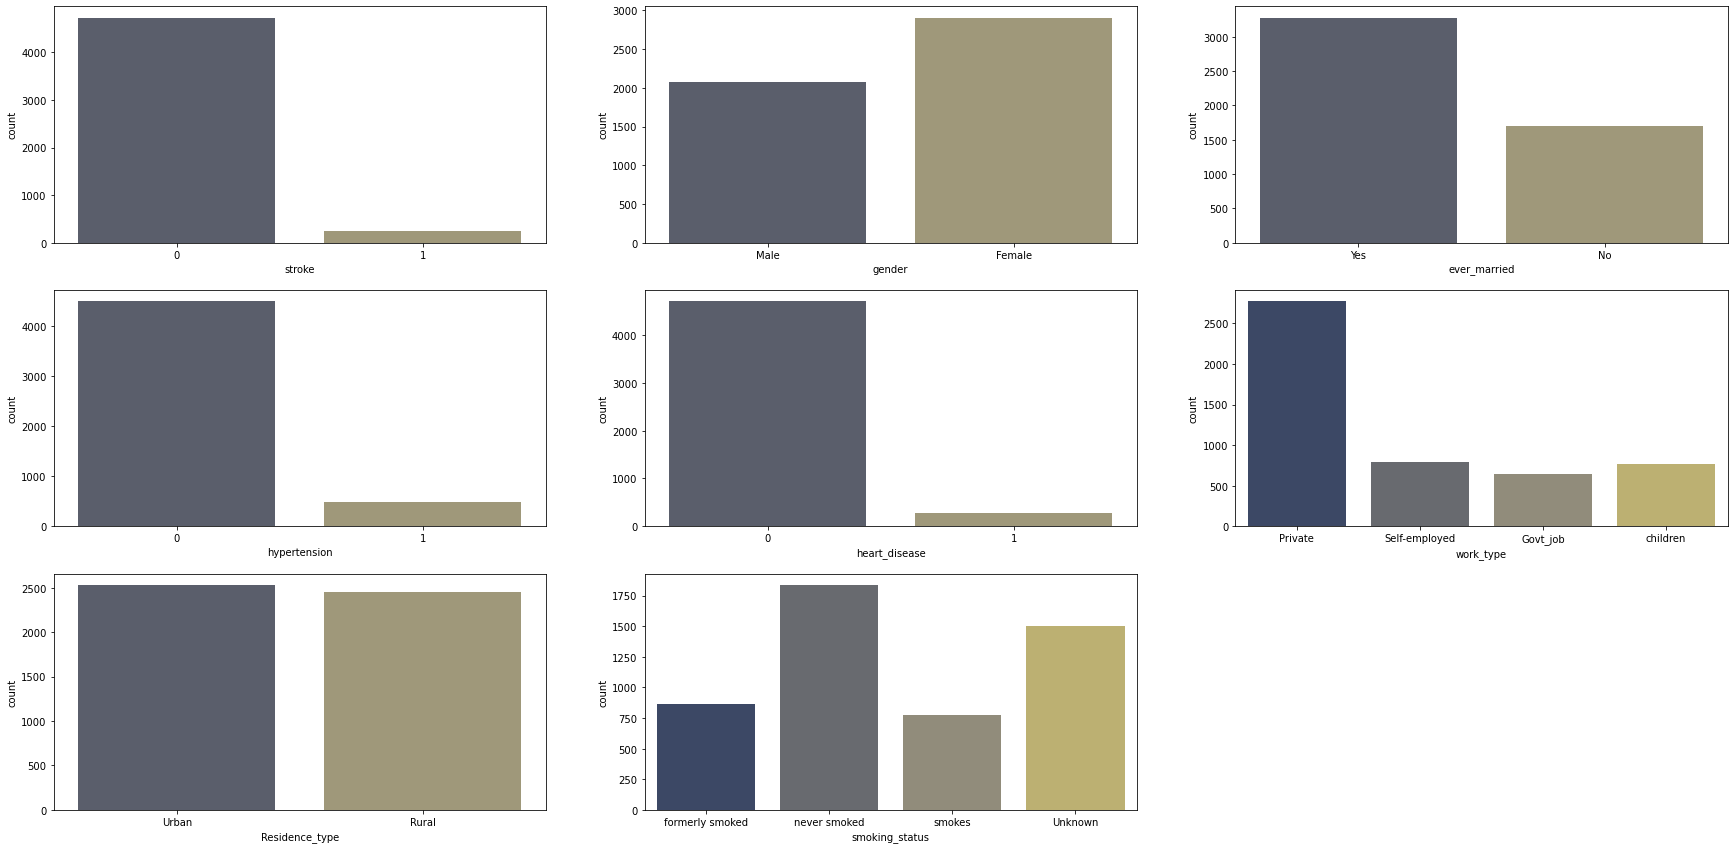

In [49]:
features = ['stroke','gender','ever_married','hypertension', 'heart_disease','work_type', 'Residence_type','smoking_status']
plt.figure(figsize =(30,20))
for i in enumerate(features):
    plt.subplot(4,3,i[0]+1)
    sns.countplot(i[1], data = df, palette = 'cividis')

### Summary of visualization 1.
1. The number of people without stroke and/or other disease is overwhelmingly higher than those who have had them. This indicates that the data is highly imbalanced and will affect the outcome of trained data used in the predictive models.

2. A significant number of people in this dataset are  married, female and work in the private sector.


3. The data also shows that most of the people fall in the 'never smoked' and 'unknown' category.

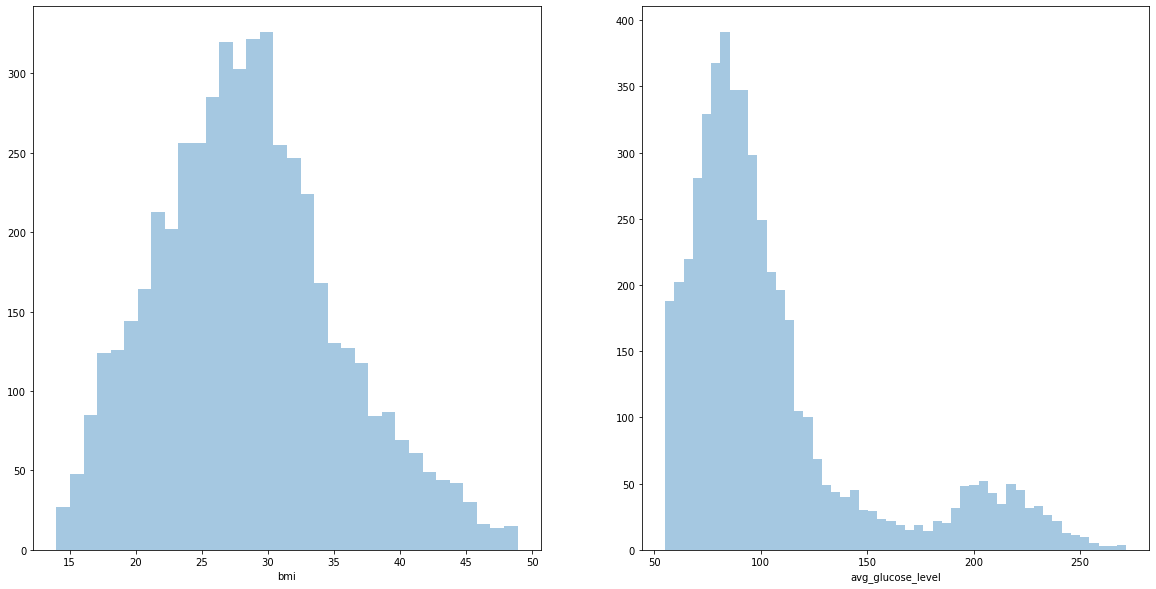

In [50]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(df.bmi, kde = False)

plt.subplot(1,2,2)
sns.distplot(df.avg_glucose_level, kde = False)
plt.show()

### Summary of visualization 2.

BMI:  patients bmi peaks btween ranges 23 to 32 which indicates that a majority of patients are overweight.
AGL(average glucose levels): Peaks at 70-90 

### Confusuion Matrix Before Label Encoding

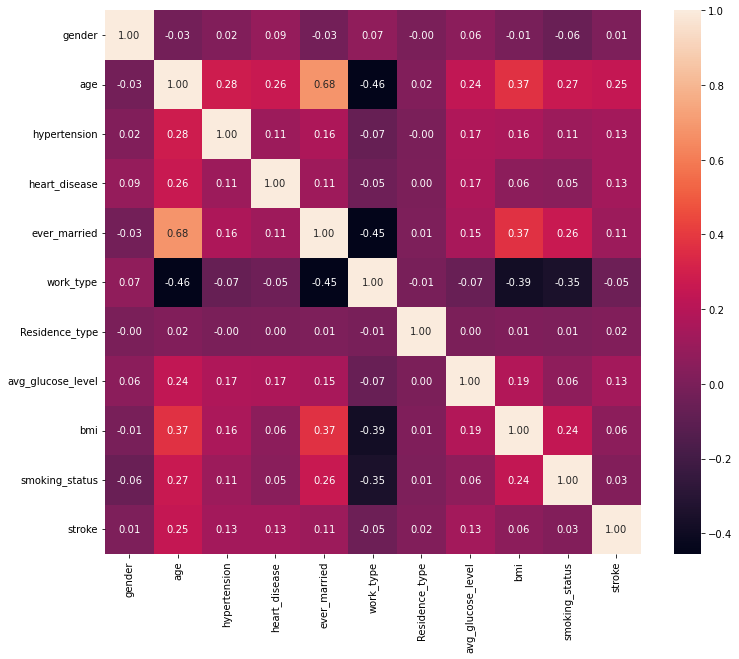

In [51]:
plt.figure(figsize=(12,10))
sns.heatmap(new_df1.corr(), annot=True, fmt= ".2f")
plt.show()

### Data Manipulation, Exploration & Visualization.

In [52]:
new_df=df
new_df1 = df

In [53]:
# Splitting the age into bins and in a new column.
new_df['age_bins'] =pd.cut(new_df['age'],
       bins=[0,10,20,30,40,50,60,70,80,90],
       labels=['10',
               '20', 
               '30', 
               '40','50','60','70','80', '90'])

In [54]:
# Splitting bmi into bins and in a new column.
new_df['weight_status']=pd.cut(new_df['bmi'],
       bins=[0,18.5, 24.9, 30,200],
       labels=['underweight', 
               'normal', 
               'overweight', 
               'obese'])

In [55]:
#categorizing those who have had stroke and 1 more disease, all three and singularly.
def categorise(row):  
    if row['hypertension']<1 and row['heart_disease'] < 1 and row['stroke'] < 1:
        return 'low risk'
    if row['hypertension']>0 and row['heart_disease'] >0 and row['stroke'] >0:
        return 'HTN/HD/STRK'
    elif row['hypertension'] >0 and row['stroke'] >0  and row['heart_disease'] < 1:
        return 'STRK/HTN'
    elif row['heart_disease'] >0 and row['stroke']>0 and row['hypertension'] < 1:
        return 'HD/STRK'
    elif row['heart_disease']>0 and row['hypertension']>0 and row['stroke'] < 1:
        return 'HD/HTN'
    elif row['stroke']>0 and row['hypertension']<1 and row['heart_disease'] < 1:
        return 'STRK'
    elif row['hypertension']>0 and row['heart_disease']<1 and row['stroke'] < 1:
        return 'HTN'
    elif row['heart_disease']>0 and row['hypertension']<1 and row['stroke'] < 1:
        return 'HD'
    return 'unknown'

In [56]:
new_df['health_status'] = new_df.apply(lambda row: categorise(row), axis=1)

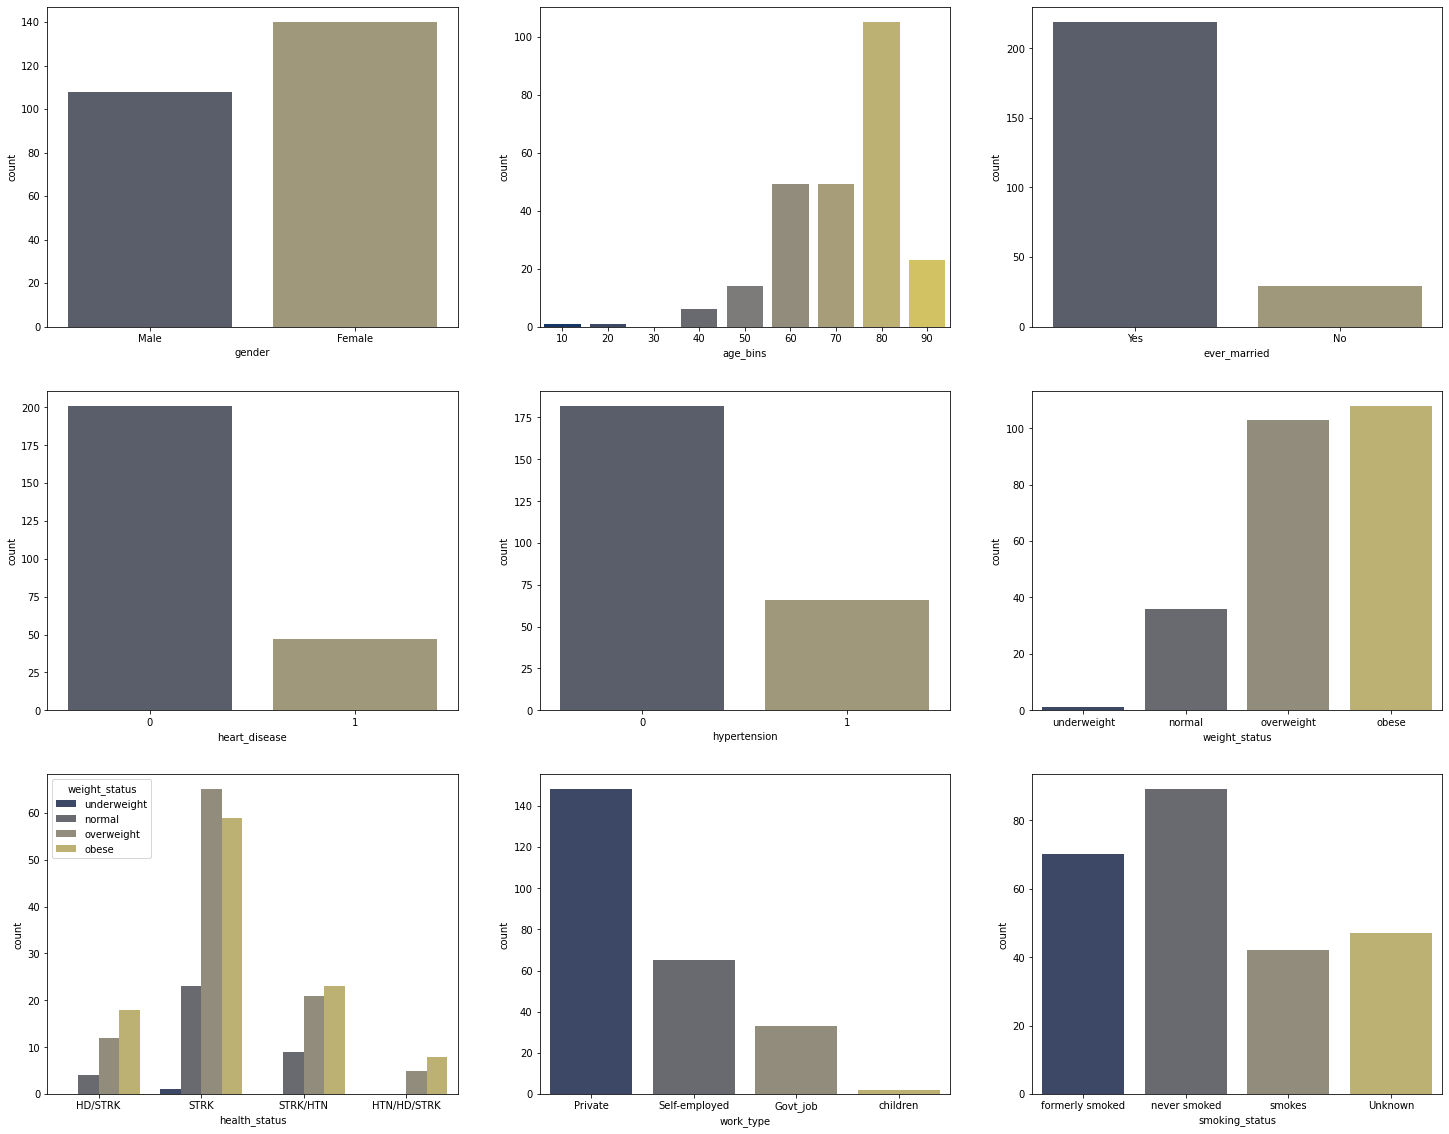

In [57]:
plt.figure(figsize=(25,20))
plt.subplot(3,3,1)
sns.countplot('gender', data = new_df.query('stroke>0'), palette='cividis')

plt.subplot(3,3,2)
sns.countplot('age_bins', data = new_df.query('stroke>0'),palette='cividis')

plt.subplot(3,3,3)
sns.countplot('ever_married', data = new_df.query('stroke>0'),palette='cividis')

plt.subplot(3,3,4)
sns.countplot('heart_disease', data = new_df.query('stroke>0'),palette='cividis')
#plt.xticks(rotation = 45)

plt.subplot(3,3,5)
sns.countplot('hypertension', data = new_df.query('stroke>0'),palette='cividis')

plt.subplot(3,3,6)
sns.countplot('weight_status', data = new_df.query('stroke>0'),palette='cividis')

plt.subplot(3,3,7)
sns.countplot('health_status', data = new_df.query('stroke>0'), hue = 'weight_status',palette='cividis')

plt.subplot(3,3,8)
sns.countplot('work_type', data = new_df.query('stroke>0'),palette='cividis')

plt.subplot(3,3,9)
sns.countplot('smoking_status', data = new_df.query('stroke>0'), palette='cividis')


plt.show()  

## Further observations focusing on patients who have had stroke.

##### The above visiualizations gives insights into the data trends focusing solely on patients who have had stroke:

- There are more females than males who have had stroke.

- The age bracket peaks at the 80's range. The majority of them fall within 60 to 80 years.

- Patients with stroke are mostly overweight and obese.

- Most of the patients have never smoked. However, a large amount are listed as former smokers. 

- The number of people who have had hypertension are more than those who have had heart disease.

##### The health status chart shows the following: 

- There are those who have had one or more comobordities.i.e stroke and one or more diseases.

- Within each health bracket, the majority of patients are obese particularly within the heart disease/stroke bracket and especially those who have had all three (heart disease, hypertension and stroke). They are mostly private workers and self employed. An overwhelming amount of them are married.

### Label Encoding

In [58]:
enc = LabelEncoder()
new_df.loc[:,['gender','ever_married','work_type','Residence_type','smoking_status']] = \
new_df.loc[:,['gender','ever_married','work_type','Residence_type','smoking_status']].apply(enc.fit_transform)
new_df.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          1   
1       1  80.0             0              1             1          1   
2       0  49.0             0              0             1          1   
3       0  79.0             1              0             1          2   
4       1  81.0             0              0             1          1   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke age_bins  \
0               1             228.69  36.6               1       1       70   
1               0             105.92  32.5               2       1       80   
2               1             171.23  34.4               3       1       50   
3               0             174.12  24.0               2       1       80   
4               1             186.21  29.0               1       1       90   

  weight_status health_status  
0         obese       HD/STRK  
1         obese       HD/STRK  
2         obese          STRK  
3        normal      STRK/HTN  
4    overweight          STRK

In [59]:
new_df = new_df.drop(['age_bins', 'weight_status', 'health_status'], axis = 1)
new_df.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          1   
1       1  80.0             0              1             1          1   
2       0  49.0             0              0             1          1   
3       0  79.0             1              0             1          2   
4       1  81.0             0              0             1          1   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
1               0             105.92  32.5               2       1  
2               1             171.23  34.4               3       1  
3               0             174.12  24.0               2       1  
4               1             186.21  29.0               1       1

### SMOTE-ENN (Balancing out the data)

In [60]:
from imblearn.combine import SMOTEENN
sen = SMOTEENN(random_state = 2)

In [61]:
x_sen = new_df.drop('stroke', axis = 1)
y_sen= new_df.stroke
x_sen.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          1   
1       1  80.0             0              1             1          1   
2       0  49.0             0              0             1          1   
3       0  79.0             1              0             1          2   
4       1  81.0             0              0             1          1   

   Residence_type  avg_glucose_level   bmi  smoking_status  
0               1             228.69  36.6               1  
1               0             105.92  32.5               2  
2               1             171.23  34.4               3  
3               0             174.12  24.0               2  
4               1             186.21  29.0               1

In [62]:
x_train_sen , y_train_sen = sen.fit_resample(x_sen, y_sen)
x_train_sen.shape, y_train_sen.shape

((8021, 10), (8021,))

### Scaling the data.

In [63]:
scaler_sen = StandardScaler()
scaler_sen.fit(x_train_sen)
std_data = scaler_sen.transform(x_train_sen)
x_train_sen = std_data
x_train_sen

array([[ 1.49474887, -2.23378339, -0.28943473, ..., -0.43509499,
        -1.80390742, -1.2764539 ],
       [-0.6690087 , -2.01581621, -0.28943473, ..., -0.14907959,
        -1.86922826, -1.2764539 ],
       [-0.6690087 ,  1.07931777, -0.28943473, ..., -0.76228065,
         0.97222816, -1.2764539 ],
       ...,
       [-0.6690087 ,  1.06996911, -0.28943473, ..., -0.97107543,
         2.30493231,  0.79547501],
       [ 1.49474887,  0.27754847,  3.45501039, ..., -0.77487909,
        -0.27879696,  0.79547501],
       [ 1.49474887,  0.22313895, -0.28943473, ..., -0.14244249,
         0.64101379, -0.24048944]])

### Train_test_split Application (training the data).

In [64]:
x_train_sen , x_test, y_train_sen, y_test = train_test_split(x_train_sen, y_train_sen, test_size = 0.3, random_state = 42)

In [65]:
x_train_sen.shape, x_test.shape, y_train_sen.shape, y_test.shape

((5614, 10), (2407, 10), (5614,), (2407,))

In [66]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

### K_Nearest Neighbors algorithm.

In [67]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train_sen, y_train_sen)
y_predict = model.predict(x_test)
acc = accuracy_score(y_test, y_predict)
acc

0.9135853759867054

In [70]:
acc = accuracy_score(y_test, y_predict)
prec = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

print('accuracy score :', acc)
print('precision score :', prec)
print('recall score :', recall)
print('f1 score :', f1)

target_name =['class 1', 'class 0']
print(classification_report(y_test, y_predict, target_names = target_name,))
cf = confusion_matrix(y_test, y_predict)
cf

accuracy score : 0.9135853759867054
precision score : 0.8824352694191743
recall score : 0.9692544196771714
f1 score : 0.9238095238095239
              precision    recall  f1-score   support

     class 1       0.96      0.85      0.90      1106
     class 0       0.88      0.97      0.92      1301

    accuracy                           0.91      2407
   macro avg       0.92      0.91      0.91      2407
weighted avg       0.92      0.91      0.91      2407



array([[ 938,  168],
       [  40, 1261]], dtype=int64)

### Creating a Predictive Model based on the KNN Algorithm.

In [209]:
#new_df.sample(frac=1).reset_index(drop=True).head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       0  36.0             0              0             1          1   
1       1  49.0             0              0             1          1   
2       0  55.0             0              0             1          1   
3       0  59.0             1              0             1          1   
4       0  70.0             0              1             1          1   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               0              71.32  43.9               3       0  
1               1              87.06  28.3               2       0  
2               1              57.30  41.5               2       0  
3               0              92.04  24.2               2       0  
4               0             239.07  26.1               2       1

##### I will be testing the predictive model to see if it is able to predict accurately those who have had stroke and those who have not.
##### The data set (row 2) above shows one instance of a person who had stroke. This data as well as an instance of a person who has not had stroke,
##### will be inputed in the model to see if it would predict correctly. 
##### Data inputed, excludes the stroke column.

### Predictive model for K-Nearest Neighbors

In [254]:
inputed_data = (1, 70.0, 0, 1, 1, 1, 0, 239.07, 26.1, 2)          #Data From row 4.
data_as_np = np.asarray(inputed_data)
inputed_reshaped = data_as_np.reshape(1,-1)

std_data = scaler.transform(inputed_reshaped)
print(std_data)
prediction = model.predict(std_data)
print(prediction)


if (prediction[0] == 0):
    print('Nope!!! This person has not had stroke')
else:
    print('Oh yeah. definitely had stroke')

[[ 1.00305350e+00  6.99434281e+01  5.61167343e-03  9.87139929e-01
   1.00854890e+00  9.91528461e-01 -7.48478438e-03  2.39964211e+02
   2.59704324e+01  1.98405105e+00]]
[1]
Oh yeah. definitely had stroke


In [255]:
inputed_data = (1, 59.0, 1, 0, 1, 1, 0, 92.04, 24.2, 2)          #Data From row 3.
data_as_np = np.asarray(inputed_data)
inputed_reshaped = data_as_np.reshape(1,-1)

std_data = scaler.transform(inputed_reshaped)
print(std_data)
prediction = classifier.predict(std_data)
print(prediction)


if (prediction[0] == 0):
    print('Nope!!! This person has not had stroke')
else:
    print('Oh yeah. definitely had stroke')

[[ 1.00305350e+00  5.89551638e+01  1.01325346e+00 -4.34753173e-03
   1.00854890e+00  9.91528461e-01 -7.48478438e-03  9.23902033e+01
   2.40812005e+01  1.98405105e+00]]
[0]
Nope!!! This person has not had stroke


### Success!!! The model was trained successfully and has correctly predicted stroke and no stroke instances.